# Support Vector Machines

## Example Dataset 1

In [35]:
import numpy as np
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt

In [2]:
data1 = scio.loadmat('data/ex6data1.mat')
data1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

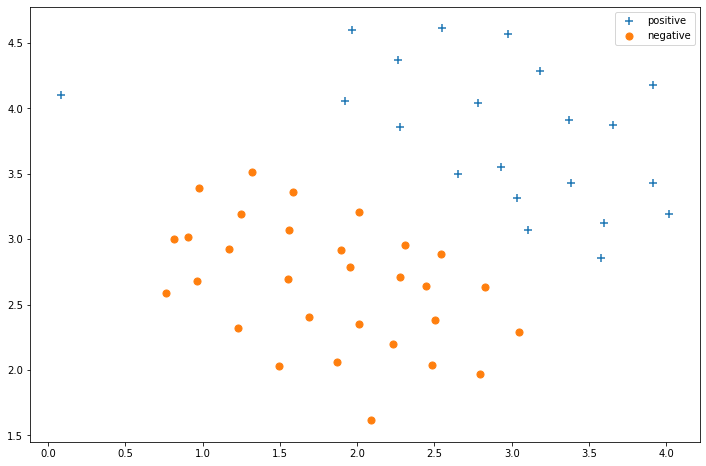

In [7]:
data = pd.DataFrame(data1['X'], columns = ['X1', 'X2'])
data['y'] = data1['y']

pos = data[data['y'].isin([1])]
neg = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(pos['X1'], pos['X2'], s = 50, marker = '+', label = 'positive')
ax.scatter(neg['X1'], neg['X2'], s = 50, marker = 'o', label = 'negative')
ax.legend()
plt.show()

**C = 1**

In [12]:
from sklearn import svm
svc = svm.LinearSVC(C = 1)
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

0.9803921568627451

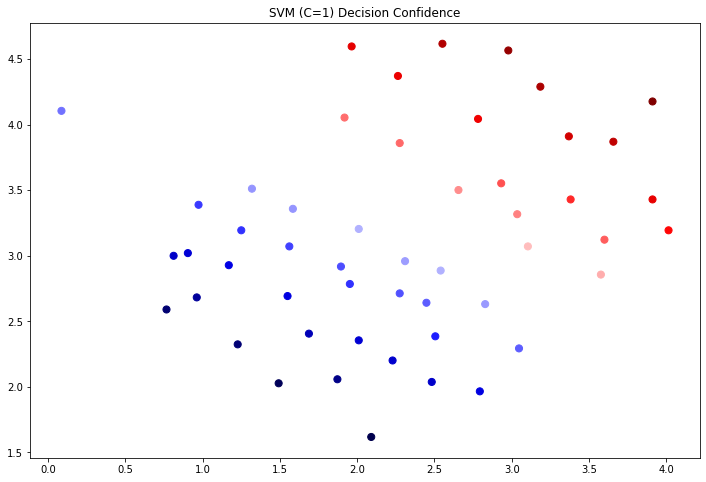

In [13]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

**C = 100**

In [14]:
svc = svm.LinearSVC(C = 100)
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

0.9803921568627451

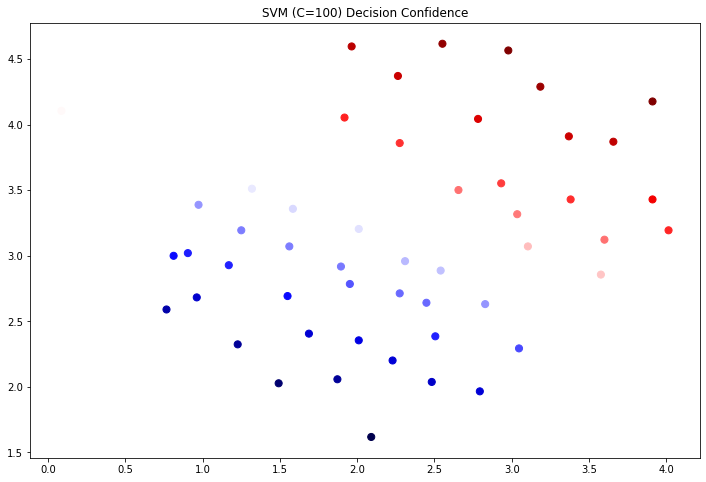

In [15]:
data['SVM 2 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

## SVM with Gaussian Kernels

In [16]:
def gasussianKernel(x1, x2, sigma):
    return np.exp(np.sum(x1 - x2) ** 2)/(2 * (sigma ** 2))

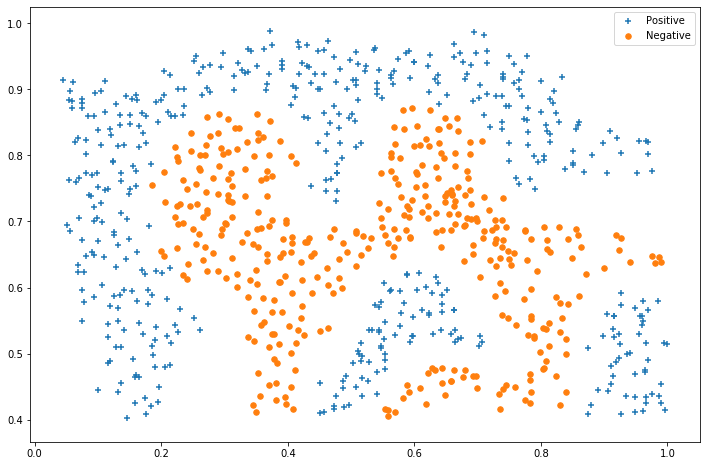

In [19]:
data2 = scio.loadmat('data/ex6data2.mat')
data = pd.DataFrame(data2['X'], columns = ['X1', 'X2'])
data['y'] = data2['y']

pos = data[data['y'].isin([1])]
neg = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(pos['X1'], pos['X2'], s = 30, marker = '+', label = 'Positive')
ax.scatter(neg['X1'], neg['X2'], s = 30, marker = 'o', label = 'Negative')
ax.legend()
plt.show()

In [24]:
svc = svm.SVC(C = 100, gamma = 10, probability = True)
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

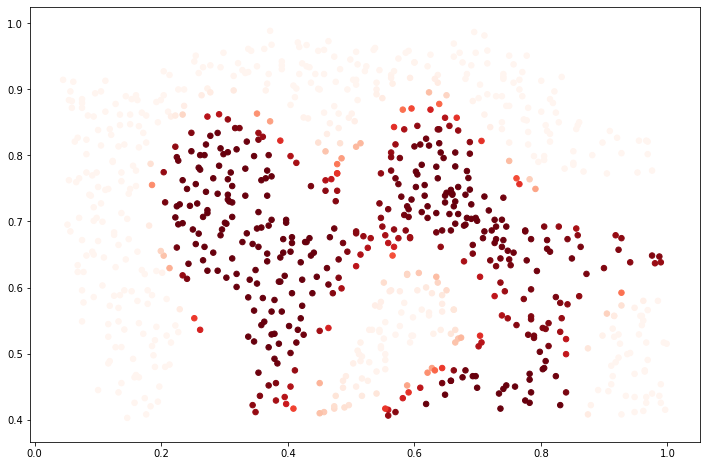

In [25]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s = 30, c = data['Probability'], cmap = 'Reds')
plt.show()

## Example Dataset 3

In [30]:
data3 = scio.loadmat('data/ex6data3.mat')
X, y, X_val, y_val = data3['X'], data3['y'], data3['Xval'], data3['yval']

C_list = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
gamma_list = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]

best_score = 0
best_params = {'C' : None,'gamma' : None}

for C in C_list:
    for gamma in gamma_list:
        svc = svm.SVC(C = C, gamma = gamma)
        svc.fit(X, y)
        score = svc.score(X_val, y_val)

        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

print(f"best socre is {best_score} , best C is {best_params['C']}, and best gamma is {best_params['gamma']}")

best socre is 0.965 , best C is 0.3, and best gamma is 100


## Spam Classification

**Email processing**

•Lower-casing:The  entire  email  is  converted  into  lower  case,  sothat  captialization  is  ignored  (e.g.,IndIcaTEis  treated  the  same  asIndicate).

•Stripping  HTML:All  HTML  tags  are  removed  from  the  emails.Many  emails  often  come  with  HTML  formatting;  we  remove  all  theHTML tags, so that only the content remains.

•Normalizing URLs:All URLs are replaced with the text “httpaddr”.

•Normalizing  Email  Addresses:All  email  addresses  are  replacedwith the text “emailaddr”.

•Normalizing  Numbers:All  numbers  are  replaced  with  the  text“number”.•Normalizing Dollars:All dollar signs ($) are replaced with the text“dollar”.

•Word Stemming:Words are reduced to their stemmed form.  For ex-ample, “discount”, “discounts”, “discounted” and “discounting” are allreplaced with “discount”.  Sometimes, the Stemmer actually strips offadditional characters from the end, so “include”, “includes”, “included”,and “including” are all replaced with “includ”.

•Removal of non-words:Non-words and punctuation have been re-moved.  All white spaces (tabs, newlines, spaces) have all been trimmedto a single space character.

In [39]:
spam_train = scio.loadmat('data/spamTrain.mat')
spam_test = scio.loadmat('data/spamTest.mat')
X, y, X_test, y_test = spam_train['X'], spam_train['y'], spam_test['Xtest'], spam_test['ytest']

In [40]:
svc = svm.SVC()
svc.fit(X, y)
print('Training accuracy = {0}%'.format(svc.score(X, y) * 100))

Training accuracy = 94.4%


In [44]:
print('Test accuracy = {0}%'.format(svc.score(X_test, y_test) * 100))

Test accuracy = 95.3%
